In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import statsmodels.api as sm

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

# This project will use time series analysis to analyze and predict cryptocurrency close price changes

# Acquire

### Use YFinance to pull in data for ticker symbols XEM-USD and HOT1-USD from Yahoo Finance

In [3]:
# pull in all daily data for XEM-USD
nem = yf.download("XEM-USD", period='max')
nem.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.193797,0.221762,0.189496,0.220927,0.220927,7388760
2017-11-10,0.221480,0.235801,0.185654,0.192903,0.192903,10625300
2017-11-11,0.192005,0.208632,0.184363,0.192428,0.192428,6940500
2017-11-12,0.191179,0.191179,0.165319,0.180406,0.180406,12126100
2017-11-13,0.180876,0.203314,0.180023,0.192662,0.192662,7806090


In [4]:
# check info
nem.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1532 entries, 2017-11-09 to 2022-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1532 non-null   float64
 1   High       1532 non-null   float64
 2   Low        1532 non-null   float64
 3   Close      1532 non-null   float64
 4   Adj Close  1532 non-null   float64
 5   Volume     1532 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 83.8 KB


In [5]:
# pull in all daily data for HOT1-USD
holo = yf.download('HOT1-USD', period='max')
holo.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-30,0.000733,0.000789,0.000733,0.000768,0.000768,5764530
2018-05-01,0.000757,0.001046,0.000523,0.000734,0.000734,6443690
2018-05-02,0.000718,0.000976,0.000689,0.000942,0.000942,3756340
2018-05-03,0.000941,0.001885,0.000845,0.001364,0.001364,3171370
2018-05-04,0.001360,0.001907,0.001338,0.001779,0.001779,5088940


In [6]:
# check info
holo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2018-04-30 to 2022-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1360 non-null   float64
 1   High       1360 non-null   float64
 2   Low        1360 non-null   float64
 3   Close      1360 non-null   float64
 4   Adj Close  1360 non-null   float64
 5   Volume     1360 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 74.4 KB


In [7]:
# pull in hourly data since Dec 1, 2021 for XEM-USD
nem_hr = yf.download("XEM-USD", start="2021-12-01", end="2022-01-16", interval='1h')
nem_hr.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-12-01 06:00:00+00:00,0.170736,0.172766,0.170736,0.172168,0.172168,0
2021-12-01 07:00:00+00:00,0.172254,0.174341,0.171721,0.174341,0.174341,478528
2021-12-01 08:00:00+00:00,0.174169,0.174343,0.172318,0.172327,0.172327,0
2021-12-01 09:00:00+00:00,0.172491,0.172750,0.171424,0.172710,0.172710,1458904
2021-12-01 10:00:00+00:00,0.172745,0.172869,0.171591,0.171810,0.171810,864152


In [8]:
# check info
nem_hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1091 entries, 2021-12-01 06:00:00+00:00 to 2022-01-16 05:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1091 non-null   float64
 1   High       1091 non-null   float64
 2   Low        1091 non-null   float64
 3   Close      1091 non-null   float64
 4   Adj Close  1091 non-null   float64
 5   Volume     1091 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.7 KB


In [9]:
# pull in hourly data since Dec 1, 2021 for XEM-USD
holo_hr = yf.download("HOT1-USD", start="2021-12-01", end="2022-01-16", interval='1h')
holo_hr.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-12-01 06:00:00+00:00,0.012031,0.012104,0.011998,0.012090,0.012090,0
2021-12-01 07:00:00+00:00,0.012095,0.012169,0.012064,0.012120,0.012120,0
2021-12-01 08:00:00+00:00,0.012130,0.012160,0.011997,0.012013,0.012013,0
2021-12-01 09:00:00+00:00,0.012008,0.012281,0.011997,0.012185,0.012185,3258464
2021-12-01 10:00:00+00:00,0.012188,0.012202,0.012058,0.012058,0.012058,0


In [10]:
# check info
holo_hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2021-12-01 06:00:00+00:00 to 2022-01-16 05:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1094 non-null   float64
 1   High       1094 non-null   float64
 2   Low        1094 non-null   float64
 3   Close      1094 non-null   float64
 4   Adj Close  1094 non-null   float64
 5   Volume     1094 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.8 KB


In [11]:
# create function to pull in data

def get_crypto_data():
    '''
    This function downloads data from Yahoo Finance using yfinance and returns four dataframes
    '''
    
    # pull in all daily data for XEM-USD
    nem = yf.download("XEM-USD", period='max')
    
    # pull in all daily data for HOT1-USD
    holo = yf.download('HOT1-USD', period='max')
    
    # pull in hourly data since Dec 1, 2021 for XEM-USD
    nem_hr = yf.download("XEM-USD", start="2021-12-01", end="2022-01-16", interval='1h')
    
    # pull in hourly data since Dec 1, 2021 for XEM-USD
    holo_hr = yf.download("HOT1-USD", start="2021-12-01", end="2022-01-16", interval='1h')
    
    return nem, holo, nem_hr, holo_hr

In [12]:
# test function
nem, holo, nem_hr, holo_hr = get_crypto_data()
nem.shape, holo.shape, nem_hr.shape, holo_hr.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


((1532, 6), (1360, 6), (1091, 6), (1091, 6))

## Let's plot the data to see if there's any trends or seasonality that can be identified

<AxesSubplot:xlabel='Date'>

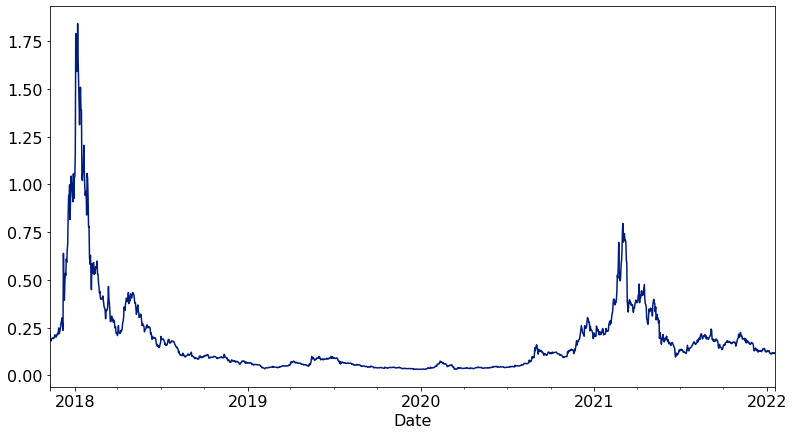

In [13]:
# plot data
nem.Close.plot()

<AxesSubplot:xlabel='Date'>

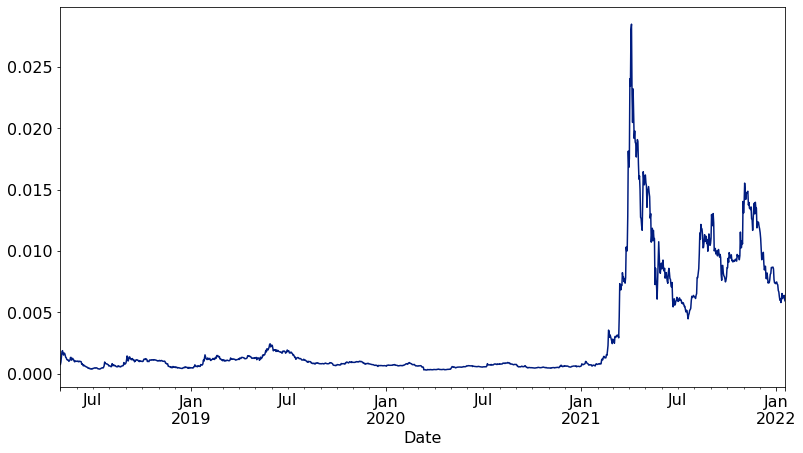

In [14]:
# plot data
holo.Close.plot()

<AxesSubplot:>

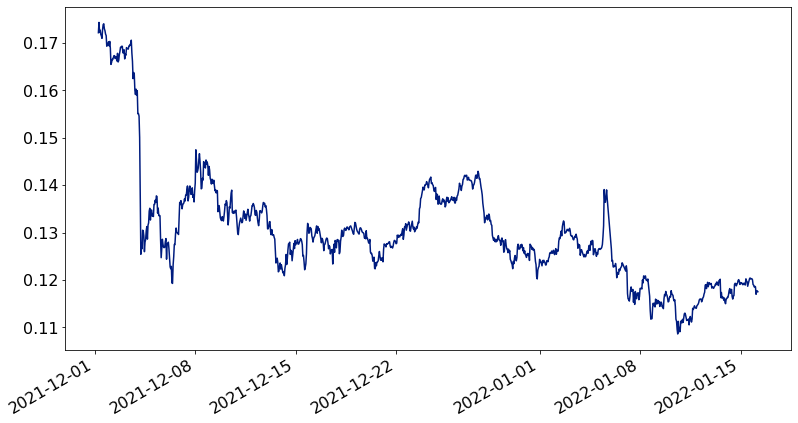

In [15]:
# plot data
nem_hr.Close.plot()

<AxesSubplot:>

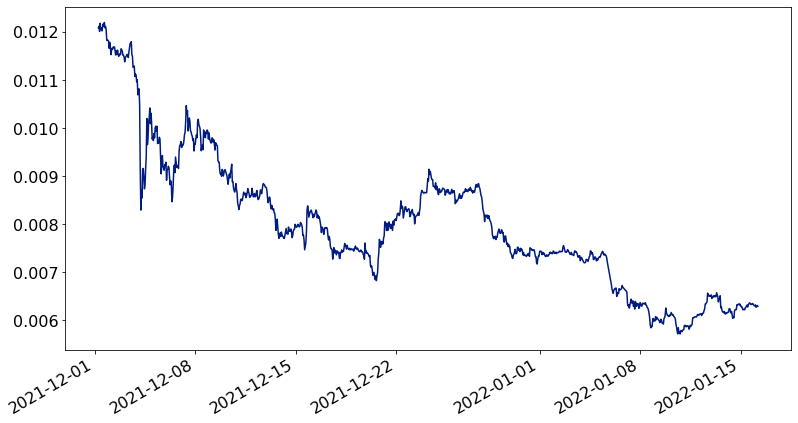

In [16]:
# plot data
holo_hr.Close.plot()

### Takeaways so far:

* None of the dataframes have any null values. All have a datetime index and correct data types for the columns. 

* It looks like there was a jump in prices in 2021 for both cryptocurrencies. Both have a downward trend since the beginning of Dec and appear to be on the rise again. There is not an obvious seasonality component.

# Prepare

### Split the data into train, validate, and test. For the first iteration, I am just going to split the data 50/30/20 for exploration and modeling. With extra time, I will try cross-validation.

In [17]:
# create a function that splits data
def split_time_series_data(df):
    '''
    This function takes in a dataframe, does a 50/30/20 split, and returns three dataframes for training, validating, and testing
    '''
    train_size = int(len(df) * .5)
    validate_size = int(len(df) * .3)
    test_size = int(len(df) - train_size - validate_size)
    validate_end_index = train_size + validate_size

    # split into train, validation, test
    train = df[: train_size]
    validate = df[train_size : validate_end_index]
    test = df[validate_end_index : ]
    
    return train, validate, test

In [18]:
# use function to split each of the dataframes
nem_train, nem_validate, nem_test = split_time_series_data(nem)
holo_train, holo_validate, holo_test = split_time_series_data(holo)
# nem_hr_train, nem_hr_validate, nem_hr_test = split_time_series_data(nem_hr)
# holo_hr_train, holo_hr_validate, holo_hr_test = split_time_series_data(holo_hr)

In [19]:
nem_train.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.193797,0.221762,0.189496,0.220927,0.220927,7388760
2017-11-10,0.221480,0.235801,0.185654,0.192903,0.192903,10625300


In [20]:
# drop all columns except Close
nem_train = pd.DataFrame(nem_train.Close)
nem_validate = pd.DataFrame(nem_validate.Close)
nem_test = pd.DataFrame(nem_test.Close)

holo_train = pd.DataFrame(holo_train.Close)
holo_validate = pd.DataFrame(holo_validate.Close)
holo_test = pd.DataFrame(holo_test.Close)

In [21]:
# check that each of the dataframes is successive
nem_train.Close.tail(1)

Date
2019-12-14    0.035291
Name: Close, dtype: float64

In [22]:
nem_validate.Close.head(1)

Date
2019-12-15    0.03538
Name: Close, dtype: float64

In [23]:
nem_validate.Close.tail(1)

Date
2021-03-17    0.396541
Name: Close, dtype: float64

In [24]:
nem_test.Close.head(1)

Date
2021-03-18    0.378734
Name: Close, dtype: float64

In [25]:
holo_train.Close.tail(1)

Date
2020-03-09    0.000536
Name: Close, dtype: float64

In [26]:
holo_validate.Close.head(1)

Date
2020-03-10    0.000545
Name: Close, dtype: float64

In [27]:
holo_validate.Close.tail(1)

Date
2021-04-21    0.015004
Name: Close, dtype: float64

In [28]:
holo_test.Close.head(1)

Date
2021-04-22    0.012741
Name: Close, dtype: float64

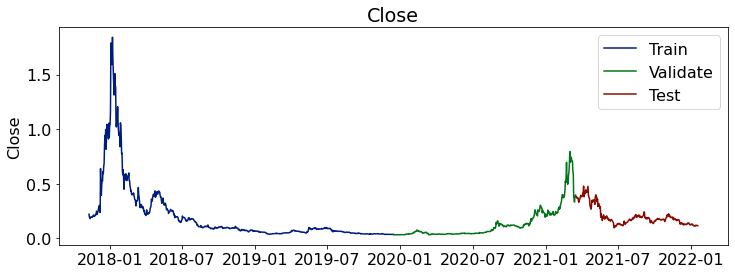

In [29]:
# plot split data for 
for col in nem_train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(nem_train[col], label='Train')
    plt.plot(nem_validate[col], label='Validate')
    plt.plot(nem_test[col], label='Test')
    plt.ylabel(col)
    plt.legend()
    plt.title(col)
    plt.show()

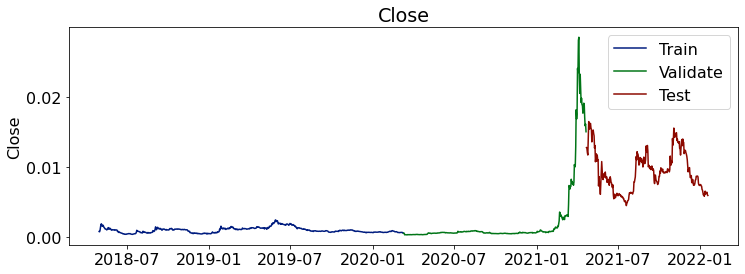

In [30]:
# plot split data
for col in holo_train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(holo_train[col], label='Train')
    plt.plot(holo_validate[col], label='Validate')
    plt.plot(holo_test[col], label='Test')
    plt.ylabel(col)
    plt.legend()
    plt.title(col)
    plt.show()

In [31]:
# check info
nem_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2017-11-09 to 2019-12-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   766 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [32]:
# check info
holo_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 680 entries, 2018-04-30 to 2020-03-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   680 non-null    float64
dtypes: float64(1)
memory usage: 10.6 KB


In [33]:
# check statistical information
nem_train.describe()

,Close
count,766.000000
mean,0.200215
std,0.278209
min,0.034763
25%,0.055447
50%,0.090638
75%,0.221060
max,1.842720


In [34]:
# check statistical information
holo_train.describe()

,Close
count,680.000000
mean,0.000969
std,0.000387
min,0.000366
25%,0.000671
50%,0.000911
75%,0.001169
max,0.002432


array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

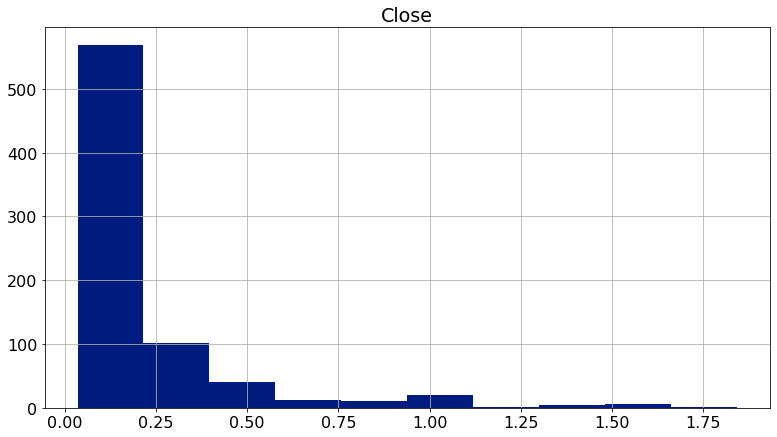

In [35]:
# plot distribution
nem_train.hist()

array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

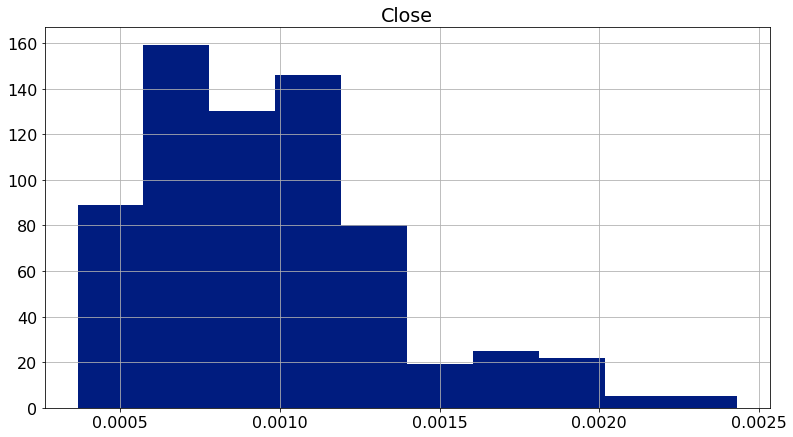

In [36]:
# plot distribution
holo_train.hist()

In [37]:
# calculate range of price movement
nem_train.Close.max() - nem_train.Close.min()

1.8079570308327675

In [38]:
# calculate range of price movement
holo_train.Close.max() - holo_train.Close.min()

0.002065999899059534

<AxesSubplot:xlabel='Date'>

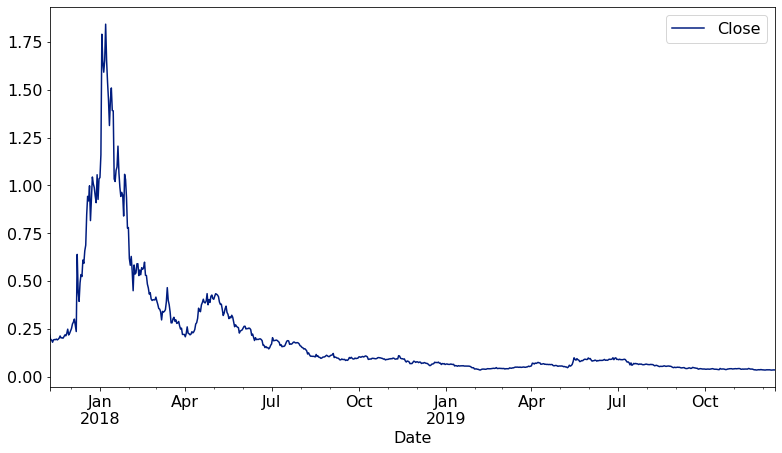

In [39]:
# plot data
nem_train.plot()

<AxesSubplot:xlabel='Date'>

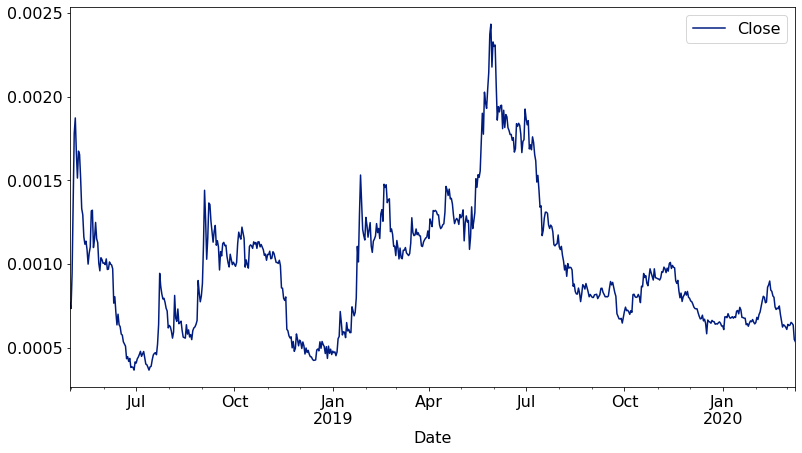

In [40]:
# plot data
holo_train.plot()

In [41]:
nem_train.head()

,Close
Date,
2017-11-09,0.220927
2017-11-10,0.192903
2017-11-11,0.192428
2017-11-12,0.180406
2017-11-13,0.192662


In [42]:
# create subsets where the timeframes overlap
a = nem_train['2018-04-30':]
b = holo_train[:'2019-12-14']

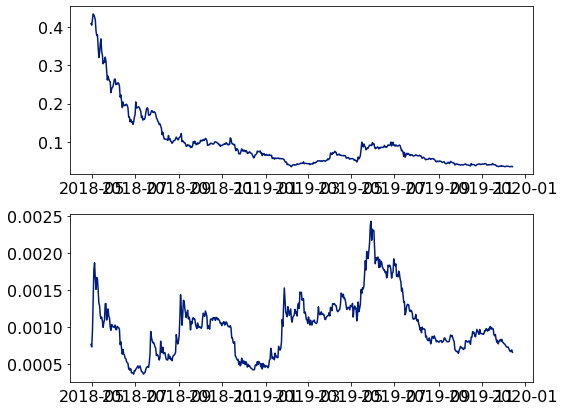

In [43]:
# plot overlapping timeframes to compare
fig=plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.plot(a, label='NEM')
ax2.plot(b, label='HOLO')
plt.tight_layout()

### More Takeaways:


* nem_train has daily data from 11/9/2017 to 12/14/2019, a little over two years*
* holo_train has daily data from 4/30/2018 to 3/09/2020, a little less than one year*
* nem close prices have a much larger range than holo
* when plotting out price movements where the data for the two cryptocurrencies overlap, we do see some similarities but due to the scale it is much more obvious with HOLO than NEM

*crypto markets are open 24/7

In [44]:
# add a month and weekday column
nem_train = nem_train.assign(month=nem_train.index.strftime('%b'), weekday=nem_train.index.strftime('%a'))
nem_train.head(2)

,Close,month,weekday
Date,,,
2017-11-09,0.220927,Nov,Thu
2017-11-10,0.192903,Nov,Fri


<AxesSubplot:xlabel='Date'>

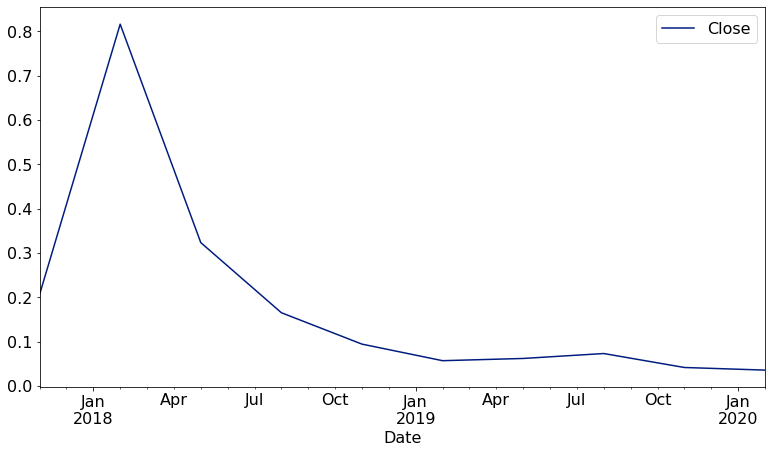

In [45]:
# resample to 3 month mean and plot
nem_train.resample('3M').mean().plot()

<AxesSubplot:xlabel='Date'>

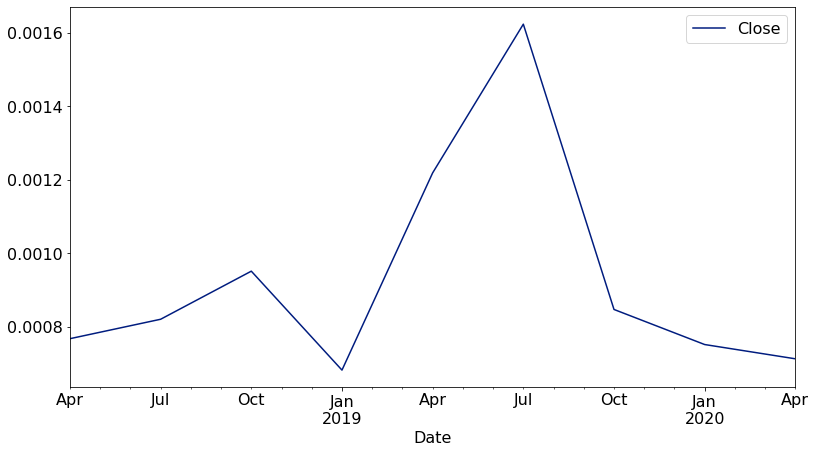

In [46]:
# resample to 3 month mean and plot
holo_train.resample('3M').mean().plot()

<AxesSubplot:xlabel='Date'>

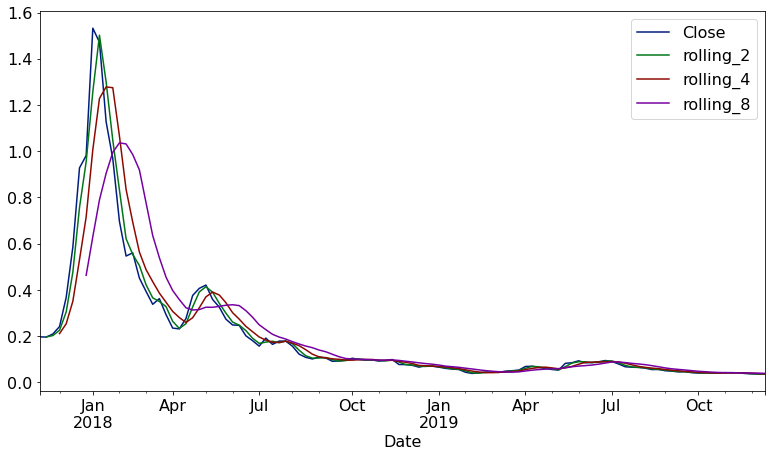

In [47]:
# calculate and plot rolling average for NEM
rolling_df = nem_train.resample('W').mean().assign(
    rolling_2=lambda nem_train: nem_train.Close.rolling(2).mean(),
    rolling_4=lambda nem_train: nem_train.Close.rolling(4).mean(),
    rolling_8=lambda nem_train: nem_train.Close.rolling(8).mean(),
)
rolling_df.plot()

<AxesSubplot:xlabel='Date'>

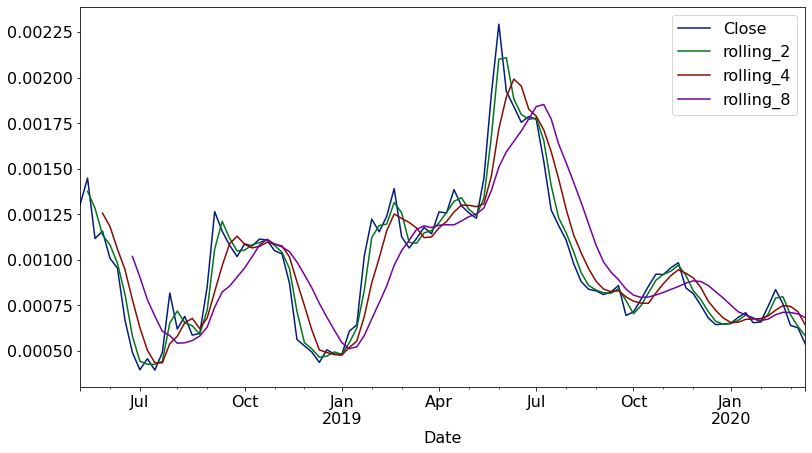

In [48]:
# calculate and plot rolling average for HOLO
rolling_df = holo_train.resample('W').mean().assign(
    rolling_2=lambda holo_train: holo_train.Close.rolling(2).mean(),
    rolling_4=lambda holo_train: holo_train.Close.rolling(4).mean(),
    rolling_8=lambda holo_train: holo_train.Close.rolling(8).mean(),
)
rolling_df.plot()

In [49]:
# create a new row with the day-to-day differences
nem_train['daily_diff'] = nem_train.Close.diff(1)

In [50]:
# get the max difference and the day it happened
print(nem_train['daily_diff'].max())
print(nem_train['daily_diff'].idxmax())

0.6301000118255615
2018-01-03 00:00:00


In [51]:
# Jan 3, 2018 the price of NEM went up .63 from the previous day's close
nem_train['2018-01'].head()

<ipython-input-51-5f92a6fd50b0>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  nem_train['2018-01'].head()


,Close,month,weekday,daily_diff
Date,,,,
2018-01-01,1.04137,Jan,Mon,0.00732
2018-01-02,1.16018,Jan,Tue,0.11881
2018-01-03,1.79028,Jan,Wed,0.63010
2018-01-04,1.64481,Jan,Thu,-0.14547
2018-01-05,1.59179,Jan,Fri,-0.05302


In [52]:
# create a new row with the day-to-day differences
holo_train['daily_diff'] = holo_train.Close.diff(1)

# get the max difference and the day it happened
print(holo_train['daily_diff'].max())
print(holo_train['daily_diff'].idxmax())

0.0004220000118948519
2018-05-03 00:00:00


In [53]:
# check out weekly differences
weekly_nem = nem_train.resample('W').mean()
weekly_nem['weekly_diff'] = weekly_nem.Close.diff(1)
weekly_nem

,Close,daily_diff,weekly_diff
Date,,,
2017-11-12,0.196666,-0.013507,NaN
2017-11-19,0.195521,0.003077,-0.001145
2017-11-26,0.208940,0.001706,0.013419
2017-12-03,0.241105,0.008861,0.032165
2017-12-10,0.367527,0.016864,0.126422
...,...,...,...
2019-11-17,0.040815,0.000169,-0.000596
2019-11-24,0.038040,-0.000948,-0.002775
2019-12-01,0.036487,0.000191,-0.001554


In [54]:
# get the max difference and the week it happened
print(weekly_nem['weekly_diff'].max())
print(weekly_nem['weekly_diff'].idxmax())

0.5510816999844141
2018-01-07 00:00:00


In [55]:
# check out monthly differences for NEM
monthly_nem = nem_train.resample('M').mean()
monthly_nem['monthly_diff'] = monthly_nem.Close.diff(1)
monthly_nem

,Close,daily_diff,monthly_diff
Date,,,
2017-11-30,0.206265,0.000274,NaN
2017-12-31,0.670937,0.026044,0.464673
2018-01-31,1.231716,-0.008200,0.560778
2018-02-28,0.517355,-0.013502,-0.714360
2018-03-31,0.320151,-0.005829,-0.197204
2018-04-30,0.321385,0.006259,0.001234
2018-05-31,0.328630,-0.005283,0.007245
2018-06-30,0.203295,-0.002695,-0.125335
2018-07-31,0.176978,-0.000052,-0.026317


In [56]:
# get the max difference and the month it happened
print(monthly_nem['monthly_diff'].max())
print(monthly_nem['monthly_diff'].idxmax())

0.5607781256398847
2018-01-31 00:00:00


In [57]:
# check out monthly differences for HOLO
monthly_holo = holo_train.resample('M').mean()
monthly_holo['monthly_diff'] = monthly_holo.Close.diff(1)
monthly_holo

,Close,daily_diff,monthly_diff
Date,,,
2018-04-30,0.000768,NaN,NaN
2018-05-31,0.001240,7.612901e-06,0.000472
2018-06-30,0.000674,-1.963333e-05,-0.000566
2018-07-31,0.000544,6.548387e-06,-0.000129
2018-08-31,0.000648,6.161290e-06,0.000104
2018-09-30,0.001121,6.700001e-06,0.000473
2018-10-31,0.001092,3.870960e-07,-0.000030
2018-11-30,0.000804,-1.703333e-05,-0.000288
2018-12-31,0.000483,-1.677419e-06,-0.000321


In [58]:
# get the max difference and the month it happened
print(monthly_holo['monthly_diff'].max())
print(monthly_holo['monthly_diff'].idxmax())

0.000476558755252785
2019-02-28 00:00:00


[Text(0.5, 1.0, 'Average Close Price by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Close Price ($)')]

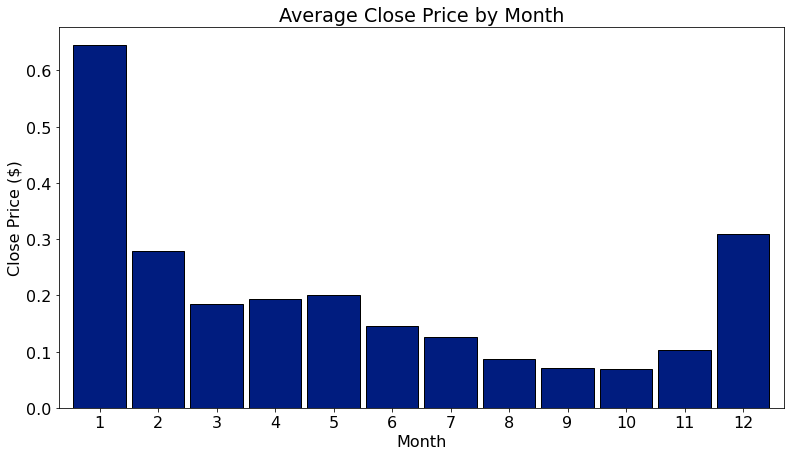

In [59]:
# plot average close price by month for NEM
ax = nem_train.groupby(nem_train.index.month).Close.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Close Price by Month', xlabel='Month', ylabel='Close Price ($)')

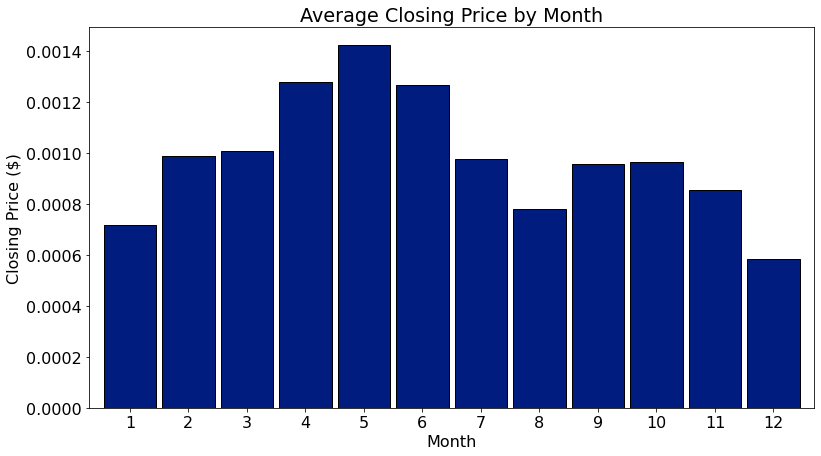

In [60]:
# plot average close price by month for HOLO
ax = holo_train.groupby(holo_train.index.month).Close.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Closing Price by Month', xlabel='Month', ylabel='Closing Price ($)');

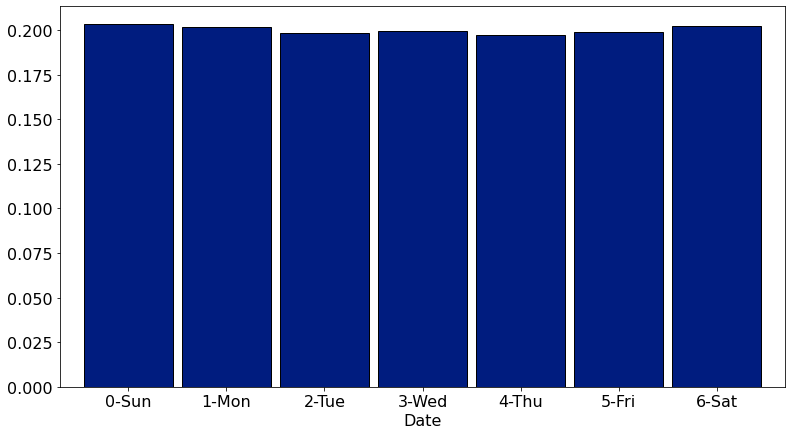

In [61]:
# plot average close price by weekday for NEM
nem_train.groupby(nem_train.index.strftime('%w-%a')).Close.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Closing Price by Weekday', xlabel='Weekday', ylabel='Closing Price ($)');

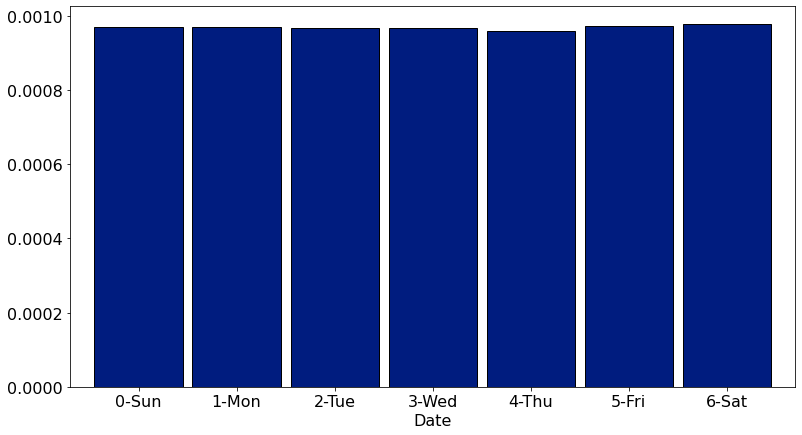

In [62]:
# plot average close price by weekday for HOLO
holo_train.groupby(holo_train.index.strftime('%w-%a')).Close.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Closing Price by Weekday', xlabel='Weekday', ylabel='Closing Price ($)');

<AxesSubplot:xlabel='weekday', ylabel='Close'>

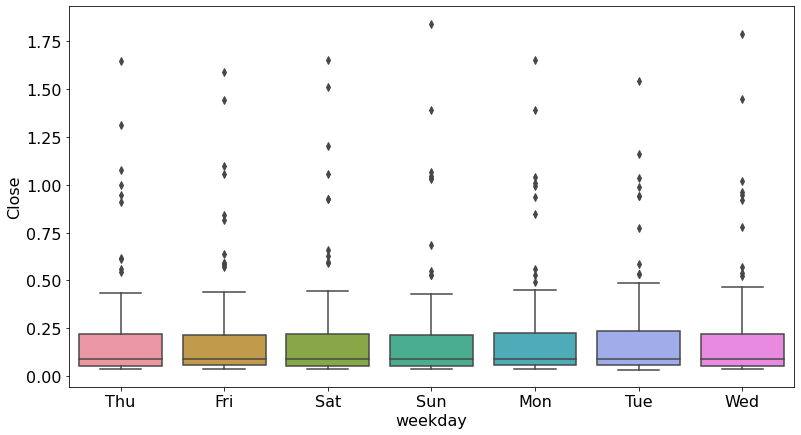

In [63]:
# boxplot by weekday for NEM
(
    nem_train.assign(weekday=nem_train.index.strftime('%a'))
    .pipe((sns.boxplot, 'data'), y='Close', x='weekday')
)

<AxesSubplot:xlabel='weekday', ylabel='Close'>

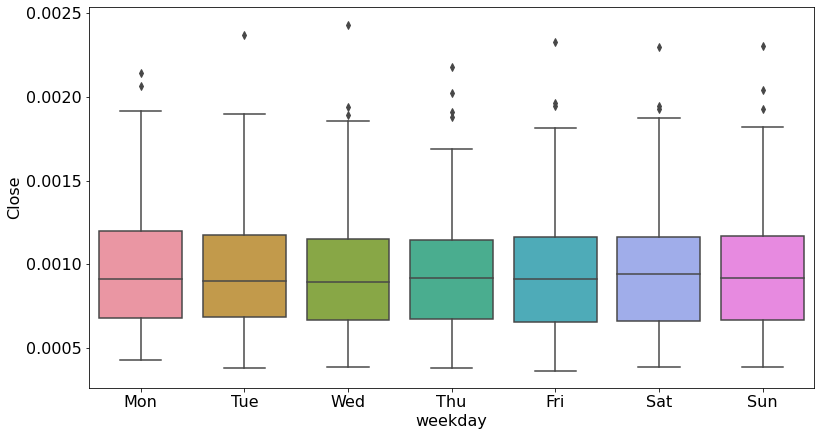

In [64]:
# boxplot by weekday for HOLO
(
    holo_train.assign(weekday=holo_train.index.strftime('%a'))
    .pipe((sns.boxplot, 'data'), y='Close', x='weekday')
)

In [65]:
# drop daily_diff column
nem_train = nem_train.drop(columns='daily_diff')
holo_train = holo_train.drop(columns='daily_diff')

In [66]:
nem_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2017-11-09 to 2019-12-14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    766 non-null    float64
 1   month    766 non-null    object 
 2   weekday  766 non-null    object 
dtypes: float64(1), object(2)
memory usage: 40.1+ KB


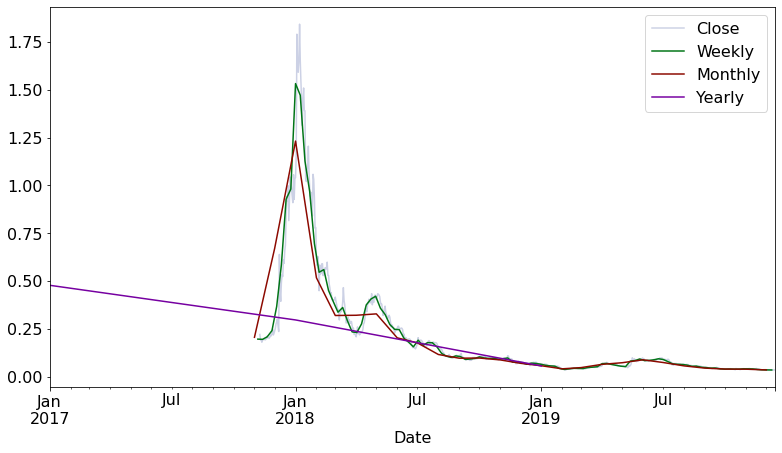

In [67]:
# resample, aggregate, and visualize over various time periods
ax = nem_train.plot(alpha=.2, label='Daily')
nem_train.resample('W').Close.mean().plot(ax=ax, label='Weekly')
nem_train.resample('M').Close.mean().plot(ax=ax, label='Monthly')
nem_train.resample('Y').Close.mean().plot(ax=ax, label='Yearly')
plt.legend()

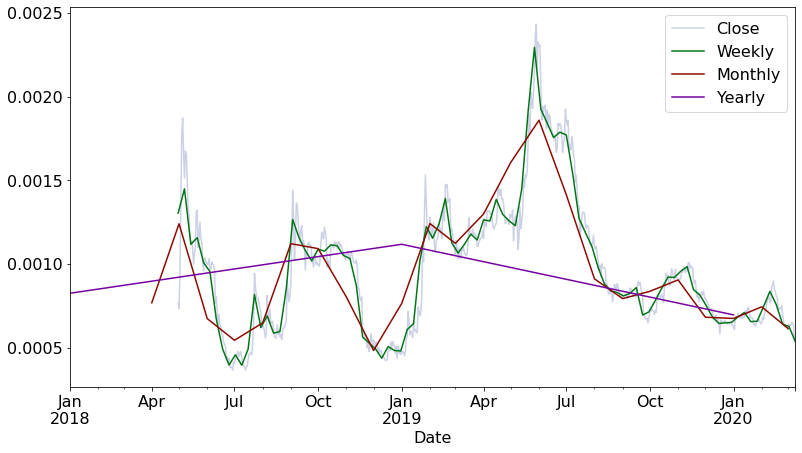

In [68]:
# resample, aggregate, and visualize over various time periods
ax = holo_train.plot(alpha=.2, label='Daily')
holo_train.resample('W').Close.mean().plot(ax=ax, label='Weekly')
holo_train.resample('M').Close.mean().plot(ax=ax, label='Monthly')
holo_train.resample('Y').Close.mean().plot(ax=ax, label='Yearly')
plt.legend()

### More Takeaways:

* when comparing average closing price per month for each of the cryptocurrencies, I do not see much similarity indicating there is not much of a relationship between month of the year and the popularity of cryptocurrency
* for both of the cryptocurrencies, average close price by day of the week doesn't vary much so this is also not a good indicator of price changes

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

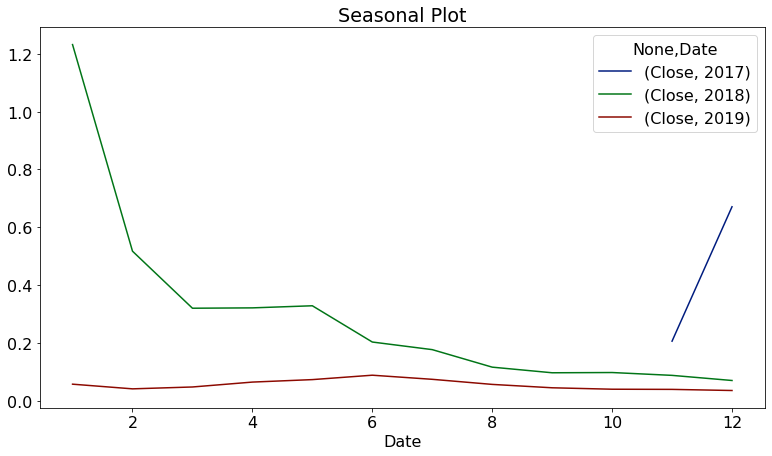

In [73]:
# plot seasonal changes for NEM
nem_train.groupby([nem_train.index.year, nem_train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

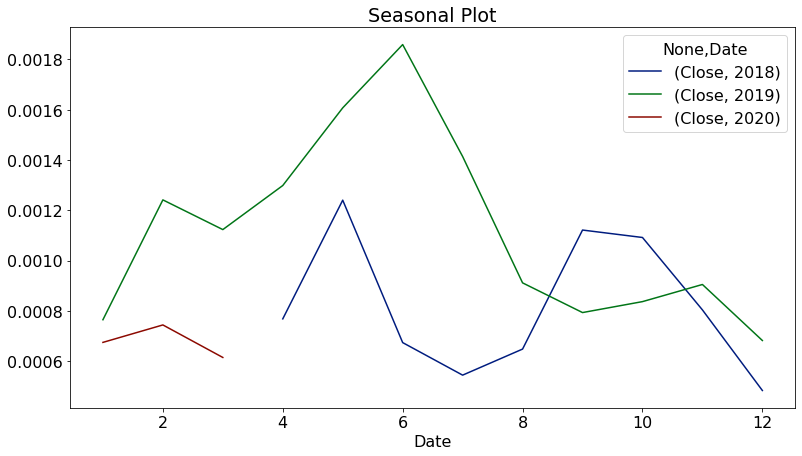

In [72]:
# plot seasonal changes for HOLO
holo_train.groupby([holo_train.index.year, holo_train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

#### For HOLO there almost appears to be some seasonality

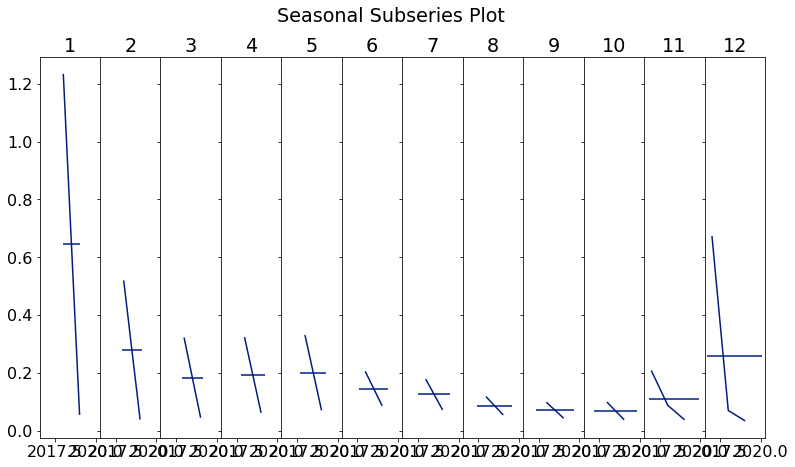

In [75]:
# plot change year over year within each month for NEM
table = nem_train.groupby([nem_train.index.year, nem_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month[1])
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

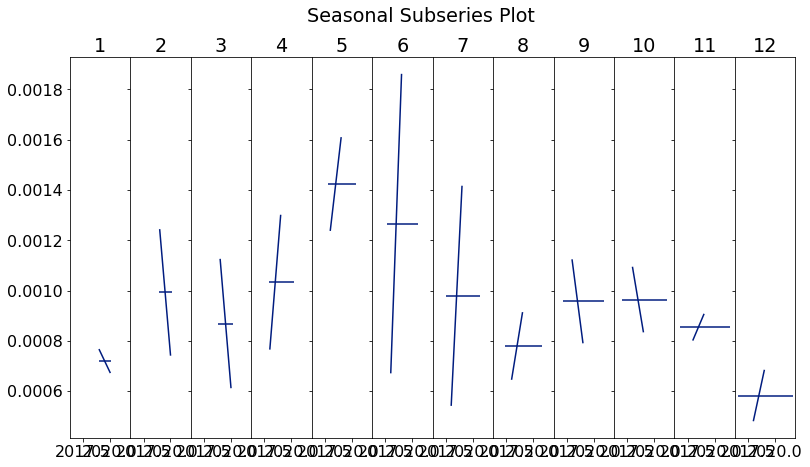

In [76]:
# plot change year over year within each month for HOLO
table = holo_train.groupby([holo_train.index.year, holo_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month[1])
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

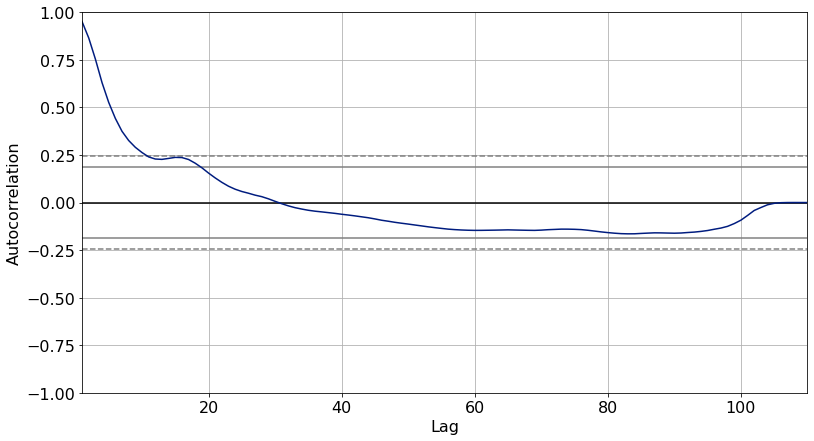

In [87]:
# plot autocorrelation for NEM
pd.plotting.autocorrelation_plot(nem_train.Close.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

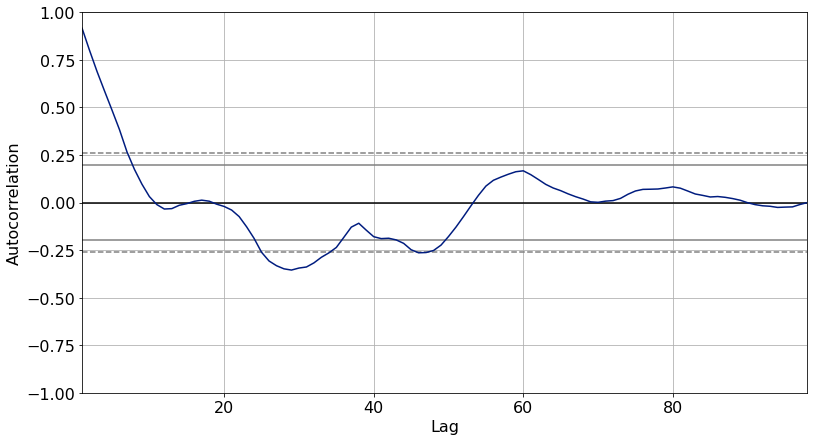

In [86]:
# plot autocorrelation for HOLO
pd.plotting.autocorrelation_plot(holo_train.Close.resample('W').mean())

#### For both cryptocurrencies, there does not appear to be much of a linear relationship between any lagged values of time

In [90]:
# calculate seasonal decomposition for NEM
y = nem_train.Close.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2017-11-12,0.196666,NaN,0.021800,NaN
2017-11-19,0.195521,NaN,0.031249,NaN
2017-11-26,0.208940,NaN,0.013884,NaN
2017-12-03,0.241105,NaN,0.016809,NaN
2017-12-10,0.367527,NaN,0.016668,NaN


<AxesSubplot:xlabel='Date'>

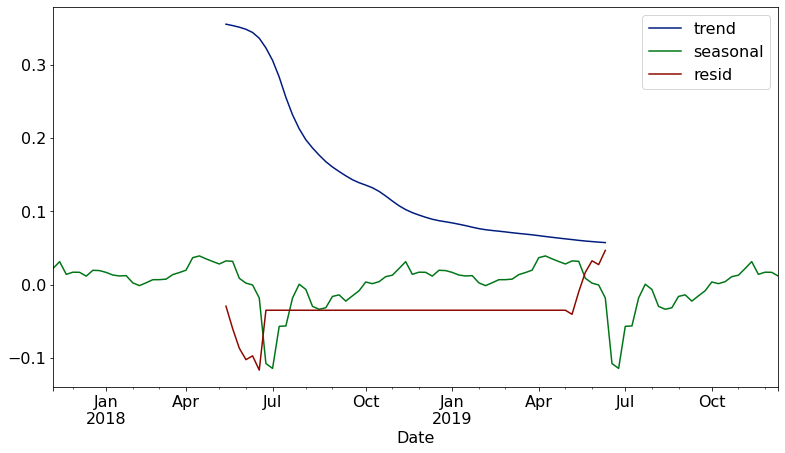

In [91]:
# plot the data
decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='Date'>

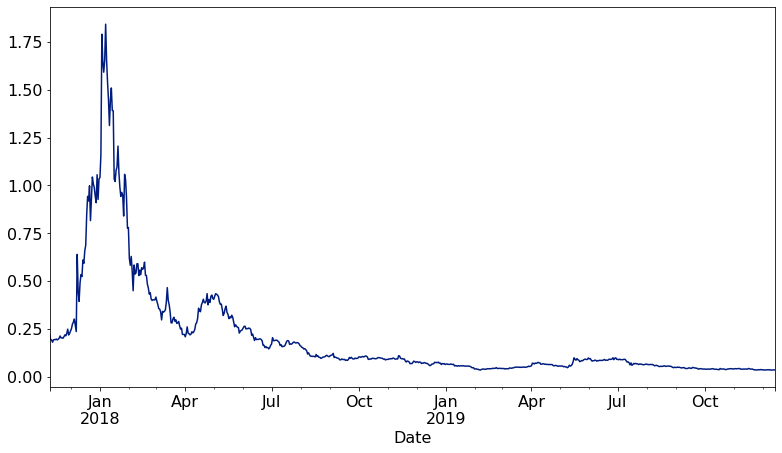

In [104]:
nem_train.Close.plot()

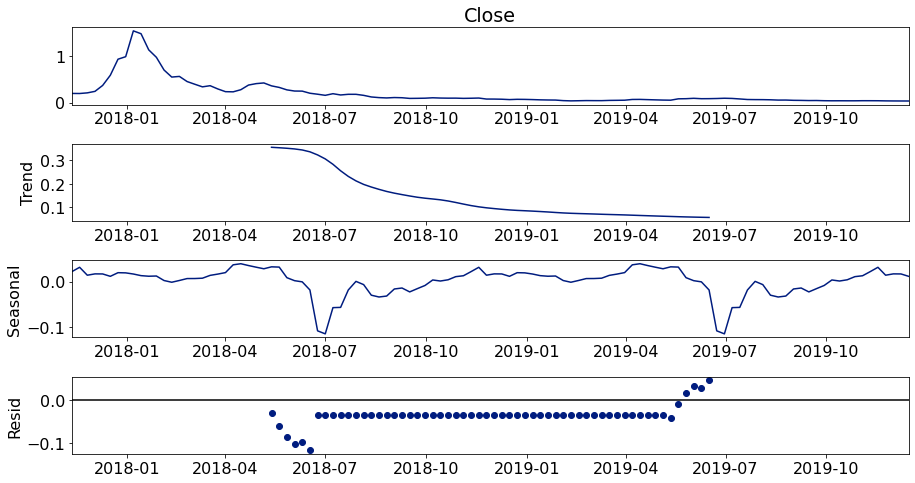

In [92]:
# plot result
result.plot()
None

In [100]:
# calculate seasonal decomposition for HOLO
y = holo_train.Close.resample('5D').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2018-04-30,0.001117,NaN,-0.000005,NaN
2018-05-05,0.001676,NaN,0.000016,NaN
2018-05-10,0.001283,NaN,0.000005,NaN
2018-05-15,0.001077,0.001207,0.000002,-0.000131
2018-05-20,0.001227,0.001188,-0.000007,0.000045


<AxesSubplot:xlabel='Date'>

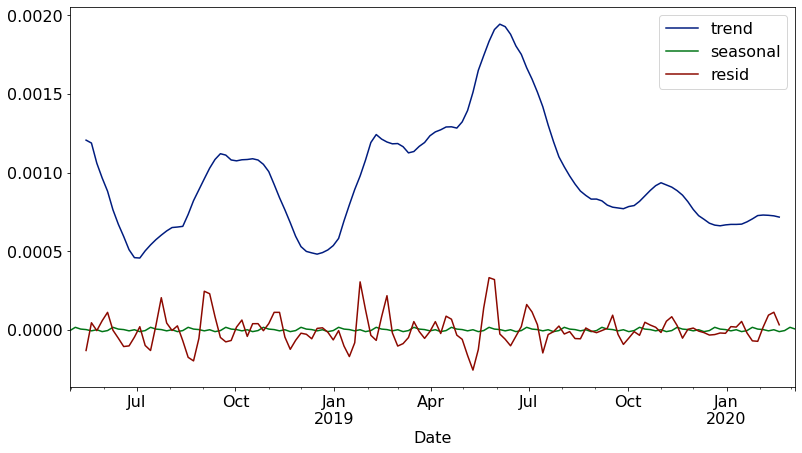

In [101]:
# plot the data
decomposition.iloc[:, 1:].plot()

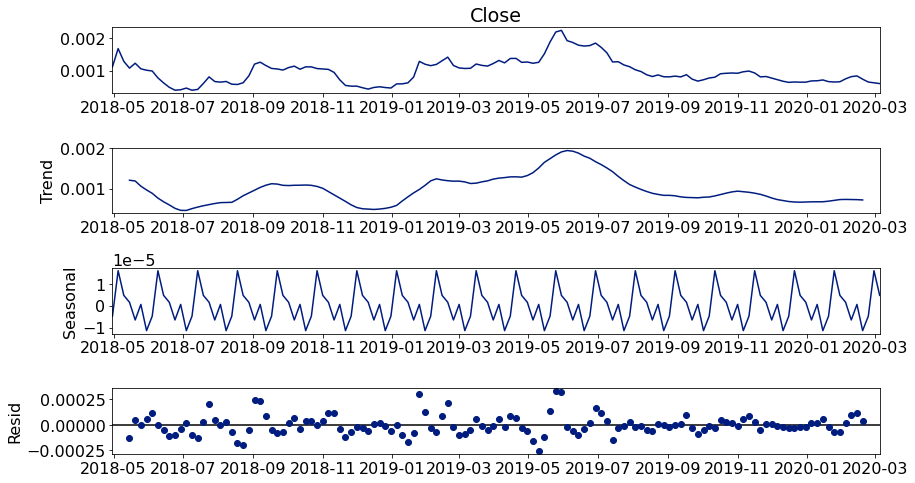

In [102]:
# plot result
result.plot()
None

### Final Explore Takeaways:

* there does not appear to be any meaningful seasonality in cryptocurrency prices or much correlation between month or day of the week and prices
* both cryptocurrencies are on a current downward trend
* NEM price may not be too difficult to predict as it has been pretty steady for the last year of data in the train dataset
* HOLO may be harder to predict as there is more volatility
* I want to check out a few models that will hopefully be able to make good predictions based on recent prices and trends since there seems to be a lack of seasonality